### Normalización vs Estandarización

En pocas palabras, la normalización es llevar los valores del conjunto de datos (dataset) a un rango de valores entre 0 y 1. Mientras que la estandarización es transformar dichos valores del dataset a un rango de valores con media en 0 y desviación en 1. Es decir, que se ajusten a la curva normal o curva Gaussiana.

#### Busquemos un dataset más complejo.

Creamos un dataset que representa velocidades de acceso a un sitio web de e-commerce asociado al monto de la compra realizado. Ambos datos respetan una distribución normal pero manejan escalas de datos muy diferentes.

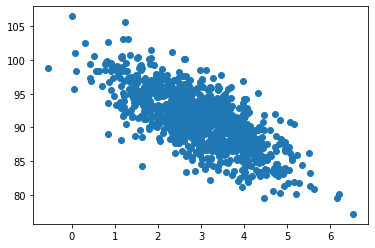

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

# generamos listado de velocidades de respuesta
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
# generamos listado de montos pagados en base a la velocidad de respuesta
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 1, 1000)) * 3

# graficamos
scatter(pageSpeeds, purchaseAmount)

In [2]:
# construimos un dataset para aplicar el preprocesamiento
speeds = np.column_stack((pageSpeeds, purchaseAmount))
speeds

array([[ 4.17128103, 87.61137575],
       [ 1.61695054, 93.79640644],
       [ 1.21803314, 94.63267859],
       ...,
       [ 1.95814058, 92.99252172],
       [ 1.92932576, 95.54357566],
       [ 3.53774347, 85.8840344 ]])

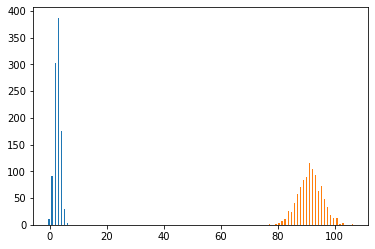

In [3]:
# graficamos
plt.hist(speeds, 100)
plt.show()

Bien, ya tenemos un nuevo dataset mucho más complejo.

***

Ahora toca Normalizarlo, para eso vamos a utilizar un MinMaxScaler...

In [4]:
# imports
from sklearn import preprocessing

La clase **MinMaxScaler** permite normalizar y escalar los valores dentro de un rango, por defecto, 0 y 1.

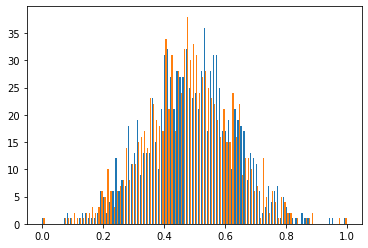

In [5]:
# construimos el MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
# transformamos los datos originales
speeds_minmax = min_max_scaler.fit_transform(speeds)

# graficamos
plt.hist(speeds_minmax, 100)
plt.show()

Probemos con otro rango de datos...

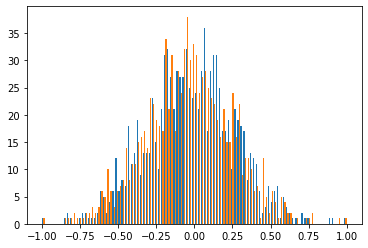

In [6]:
# construimos el MinMaxScaler con rango entre -1 y 1.
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
# transformamos los datos originales
speeds_minmax = min_max_scaler.fit_transform(speeds)

# graficamos
plt.hist(speeds_minmax, 100)
plt.show()

***

Ahora normalizamos el dataset, para eso usamos el StandardScaler

In [8]:
# construimos el StandardScaler
scaler = preprocessing.StandardScaler().fit(speeds)
# transformamos los datos originales
speeds_scaled = scaler.transform(speeds)
speeds_scaled

array([[ 1.22695954, -0.8574661 ],
       [-1.28636186,  0.61464897],
       [-1.67887474,  0.81369226],
       ...,
       [-0.95064953,  0.4233143 ],
       [-0.97900174,  1.03049721],
       [ 0.60359325, -1.26859506]])

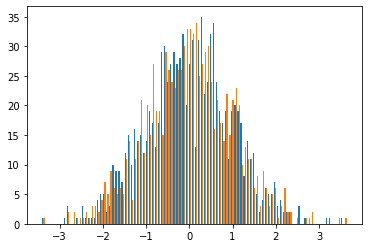

In [9]:
# graficamos
plt.hist(speeds_scaled, 100)
plt.show()

***

#### ¿Cuándo usar cada uno?

La mayoría de los algoritmos de Machine Learning requiere que los datos sean escalados. Algunos ejemplos son Regresión Lineal y Regresión Logística, KNN, K-means y las RNA o cualquier algoritmo que dependa de la técnica Gradient Descent (descenso de gradiente). Por otra parte, los algoritmos basados en árboles tales como Random Forest, XG Boost y Bagging no necesitan que los datos sean escalados.

#### Y... ¿Estandarización o Normalización?
La mayoría de los algoritmos de Machine Larning funcionan mejor aplicando una Estandarización al dataset. Mientras que las RNA o Deep Learning funcionan mejor utilizando Normalización. Esto se debe a que los valores entre 0 y 1 le permiten a los nodos de las RNA aprender más rápido la configuración óptima de sus pesos. Lo mismo sucede con las RNA que procesan imágenes, los píxeles de las imágenes son fácilmente convertibles a una combinación de valores entre 0 y 1. Al mismo tiempo, los resultados de salida de una RNA suelen ser valores probabilísticos entre 0 y 1, es decir, algo parecido a un porcentaje.